In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import nibabel as nib
import cv2
import yaml
from PIL import Image

In [2]:
with open('config.yaml') as file:
    config = yaml.load(file, Loader=yaml.FullLoader)

In [3]:
config

{'acdc': {'path_acdc': '../../datasets/acdc',
  'path_processed': '../../datasets/heart_segmentation/acdc'},
 'emidec': {'path_emidec': '../../datasets/emidec-dataset-1.0.1',
  'path_processed': '../../datasets/heart_segmentation/emidec'}}

# ACDC
classes:
- 0 - background
- 1 - right ventricular cavity
- 2 - myocardium
- 3 - left ventricular cavity

In [12]:
patient = '004'
frame = '01'
folder = 'patient' + patient
file = folder + '_' + 'frame' + frame
path_img = os.path.join(config['acdc']['path_acdc'], folder, file + '.nii.gz')
path_msk = os.path.join(config['acdc']['path_acdc'], folder, file + '_gt.nii.gz')

In [15]:
img = nib.load(path_img)
msk = nib.load(path_msk)

In [16]:
img.shape

(232, 256, 10)

In [17]:
img = img.get_fdata().astype(int)
msk = msk.get_fdata().astype(int)

In [19]:
img.shape, msk.shape

((232, 256, 10), (232, 256, 10))

In [20]:
img.min(), img.max()

(0, 1912)

In [21]:
msk.min(), msk.max()

(0, 3)

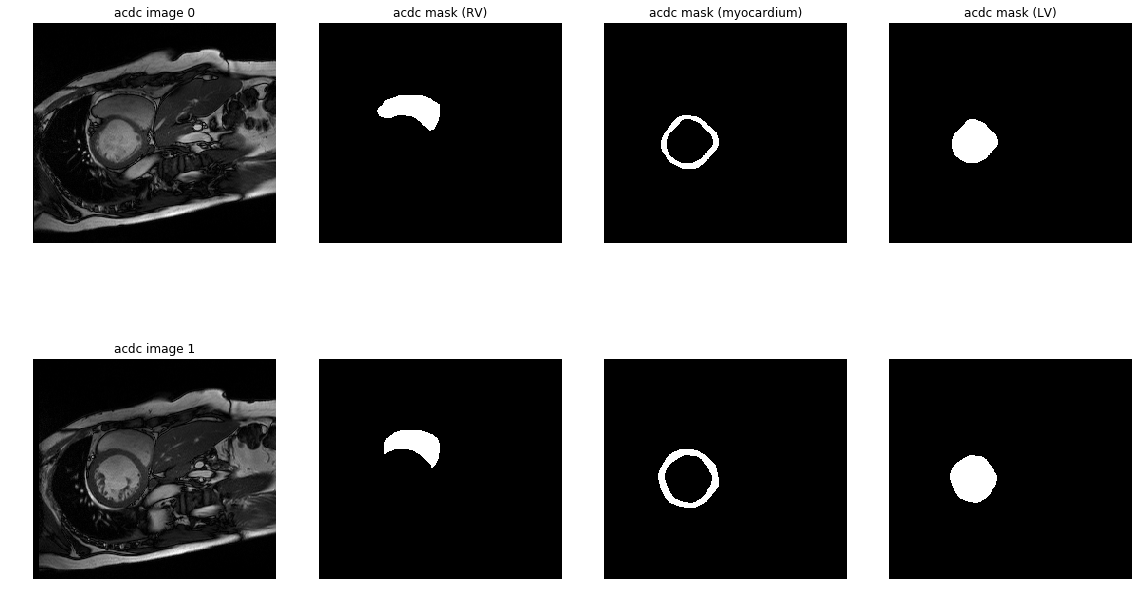

In [23]:
plt.figure(figsize=(16,10))

plt.subplot(241)
plt.title('acdc image 0')
plt.imshow(img[:,:,0], cmap = 'gray')
plt.axis('off')
plt.subplot(242)
plt.title('acdc mask (RV)')
plt.imshow(msk[:,:,0] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(243)
plt.title('acdc mask (myocardium)')
plt.imshow(msk[:,:,0] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(244)
plt.title('acdc mask (LV)')
plt.imshow(msk[:,:,0] == 3, cmap = 'gray')
plt.axis('off')

plt.subplot(245)
plt.title('acdc image 1')
plt.imshow(img[:,:,1], cmap = 'gray')
plt.axis('off')
plt.subplot(246)
plt.imshow(msk[:,:,1] == 1, cmap = 'gray')
plt.axis('off')
plt.subplot(247)
plt.imshow(msk[:,:,1] == 2, cmap = 'gray')
plt.axis('off')
plt.subplot(248)
plt.imshow(msk[:,:,1] == 3, cmap = 'gray')
plt.axis('off')

plt.tight_layout()

In [24]:
for i in range(msk[:,:,0].min(), msk[:,:,0].max() + 1):
    print(i, np.sum(msk[:,:,0] == i))

0 55371
1 1489
2 902
3 1630


## normalization

In [25]:
img.min(), img.max()

(0, 1912)

In [26]:
img[:,:,0].min(), img[:,:,0].max()

(0, 1178)

In [430]:
#!mkdir data

In [27]:
img[:,:,0] = cv2.normalize(img[:,:,0], None, 0, 255, cv2.NORM_MINMAX)

In [28]:
img[:,:,0].min(), img[:,:,0].max()

(0, 255)

### write/read

In [32]:
cv2.imwrite('data/acdc_cv2.png', img[:,:,0])
cv2.imwrite('data/acdc_cv2_gt.png', msk[:,:,0])

np.save('data/acdc_np.npy', img[:,:,0])
np.save('data/acdc_np_gt.npy', msk[:,:,0])

In [33]:
msk_cv2 = cv2.imread('data/acdc_cv2_gt.png', 0) # -1
img_cv2 = cv2.imread('data/acdc_cv2.png', 0) # -1

msk_np = np.load('data/acdc_np_gt.npy')
img_np = np.load('data/acdc_np.npy')

In [35]:
msk_cv2.shape, msk_np.shape, img_cv2.shape, img_np.shape

((232, 256), (232, 256), (232, 256), (232, 256))

# cv2 [OK]

In [36]:
msk_cv2.min(), msk_cv2.max()

(0, 3)

In [37]:
for i in range(msk_cv2.min(), msk_cv2.max() + 1):
    print(i, np.sum(msk_cv2 == i))

0 55371
1 1489
2 902
3 1630


In [38]:
img_cv2.min(), img_cv2.max()

(0, 255)

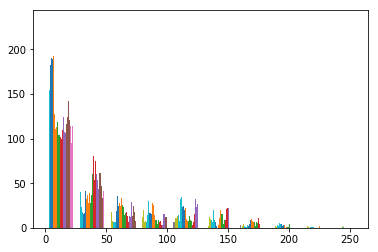

In [41]:
plt.hist(img_cv2);

# numpy [OK]

In [42]:
msk_np.min(), msk_np.max(), img_np.min(), img_np.max()

(0, 3, 0, 255)

In [44]:
for i in range(msk_np.min(), msk_np.max() + 1):
    s = np.sum(msk_np == i)
    if s != 0:
        print(i, s)

0 55371
1 1489
2 902
3 1630


# slices

In [47]:
patient = '004'
frame = '01'
folder = 'patient' + patient
file = folder + '_' + 'frame' + frame
path_img = os.path.join(config['acdc']['path_acdc'], folder, file + '.nii.gz')
path_msk = os.path.join(config['acdc']['path_acdc'], folder, file + '_gt.nii.gz')
img = nib.load(path_img)
msk = nib.load(path_msk)
img = img.get_fdata().astype(int)
msk = msk.get_fdata().astype(int)

In [48]:
img.shape, msk.shape

((232, 256, 10), (232, 256, 10))

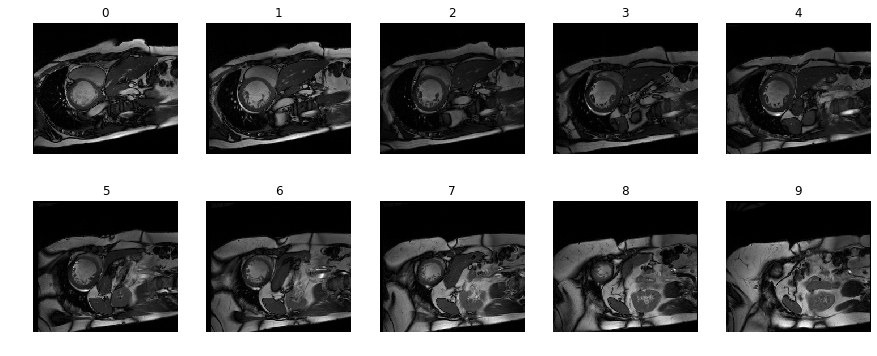

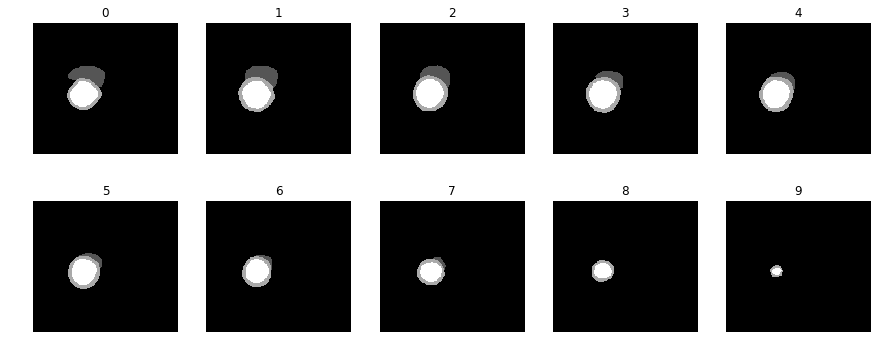

In [58]:
fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(img[:,:,i], cmap = 'gray')
    axs[i].set_title(str(i))
    axs[i].axis('off')

    
fig, axs = plt.subplots(2,5, figsize=(15, 6))
axs = axs.ravel()
for i in range(10):
    axs[i].imshow(msk[:,:,i], cmap = 'gray')
    axs[i].set_title(str(i))
    axs[i].axis('off')

# EMIDEC
The datasets consist of 100 cases: 33 normal cases (indicated by the letter 'N') and 67 pathological cases (indicated by the letter 'P'). 

For each case, there is a text file with the clinical information, a nifti file with the images and a nifti file with the labelled mask of each area 
- background
- myocardium
- cavity
- myocardial infarction
- no-reflow

In [64]:
case = 'P031'
folder = 'Case_' + case

path_img = os.path.join(config['emidec']['path_emidec'], folder, 'Images', folder + '.nii.gz')
path_msk = os.path.join(config['emidec']['path_emidec'], folder, 'Contours', folder + '.nii.gz')

In [4]:
case = 'P031'

In [65]:
img = nib.load(path_img)
msk = nib.load(path_msk)

In [66]:
img = img.get_fdata().astype(int)
msk = msk.get_fdata().astype(int)

In [67]:
img.shape, msk.shape

((214, 270, 6), (214, 270, 6))

In [68]:
for i in range(msk[:,:,0].min(), msk[:,:,0].max() + 1):
    s = np.sum(msk[:,:,0] == i)
    if s != 0:
        print(i, s)

0 57003
1 381
2 379
3 17


In [69]:
img[:,:,0].min(), img[:,:,0].max()

(0, 4094)

In [70]:
img[:,:,0] = cv2.normalize(img[:,:,0], None, 0, 255, cv2.NORM_MINMAX)

In [71]:
img[:,:,0].min(), img[:,:,0].max()

(0, 255)

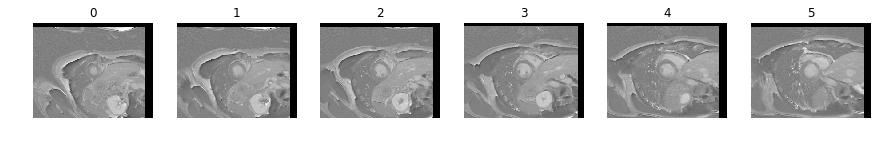

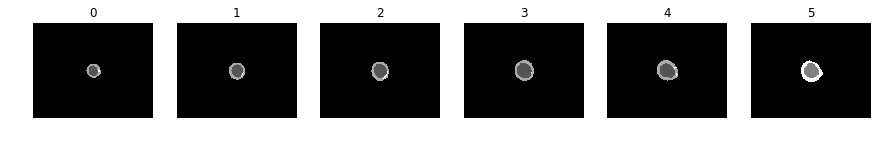

In [73]:
fig, axs = plt.subplots(1,6, figsize=(15, 6))
axs = axs.ravel()
for i in range(6):
    axs[i].imshow(img[:,:,i], cmap = 'gray')
    axs[i].set_title(str(i))
    axs[i].axis('off')

    
fig, axs = plt.subplots(1,6, figsize=(15, 6))
axs = axs.ravel()
for i in range(6):
    axs[i].imshow(msk[:,:,i], cmap = 'gray')
    axs[i].set_title(str(i))
    axs[i].axis('off')

# sunnybrook cardiac data
2009 Cardiac MR Left Ventricle Segmentation Challenge

In [75]:
import pydicom

In [76]:
d = pydicom.read_file('../../datasets/scd/SCD_DeidentifiedImages/SCD0000101/1.216_29sSOG9riFiQfXpHFLC6Zj453OlBWiLWSxWS5LSwJbcf7neGtrQ_iHpfyZ7_KVjcy_-z_+x_256_256_-23/CAP_SCD0000101_MR__hrt_raw_20120813120611055_13.dcm')

In [77]:
d

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 202
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 2.16.124.113543.6006.99.4397690831686956879
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 2.16.124.113543.6006.99.8188283439478048534
(0002, 0013) Implementation Version Name         SH: 'OSIRIX'
(0002, 0016) Source Application Entity Title     AE: ''
-------------------------------------------------
(0008, 0000) Group Length                        UL: 680
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'TIME_COURSE', 'NONE']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instanc

In [57]:
import numpy as np

In [80]:
d.pixel_array.shape

(256, 256)

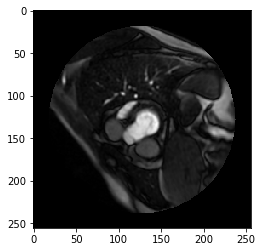

In [81]:
plt.imshow(d.pixel_array, cmap='gray');

In [82]:
! ls "../../datasets/scd/SCD_ManualContours/"

CC0_License.htm		 SC-HF-I-09   SC-HF-NI-13  SC-HYP-07  SC-N-03
ODC_Community_norms.pdf  SC-HF-I-10   SC-HF-NI-14  SC-HYP-08  SC-N-05
README.txt		 SC-HF-I-11   SC-HF-NI-15  SC-HYP-09  SC-N-06
SC-HF-I-01		 SC-HF-I-12   SC-HF-NI-31  SC-HYP-10  SC-N-07
SC-HF-I-02		 SC-HF-I-40   SC-HF-NI-33  SC-HYP-11  SC-N-09
SC-HF-I-04		 SC-HF-NI-03  SC-HF-NI-34  SC-HYP-12  SC-N-10
SC-HF-I-05		 SC-HF-NI-04  SC-HF-NI-36  SC-HYP-37  SC-N-11
SC-HF-I-06		 SC-HF-NI-07  SC-HYP-01    SC-HYP-38  SC-N-40
SC-HF-I-07		 SC-HF-NI-11  SC-HYP-03    SC-HYP-40
SC-HF-I-08		 SC-HF-NI-12  SC-HYP-06    SC-N-02
